## ***Stock Price Prediction using Regression***

## Importing Basic Libraries

In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


Importing the dataset

In [104]:
df = pd.read_csv('IDEA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-12,8.50,10.30,8.00,10.15,10.15,428987207.0
1,2020-06-15,10.80,10.80,9.90,10.15,10.15,860072479.0
2,2020-06-16,10.30,10.40,9.20,9.75,9.75,807989244.0
3,2020-06-17,9.35,10.00,9.35,9.85,9.85,449439930.0
4,2020-06-18,9.85,10.35,9.05,9.75,9.75,994738202.0


In [105]:
#We dont need the date column so we are dropping it
df = df.drop('Date', axis = 1)

Data Visualization

In [106]:
df.shape

(251, 6)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    float64
dtypes: float64(6)
memory usage: 11.9 KB


In [108]:
#Checking the null values
df.isnull().sum()
df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [109]:
#Removing the null values
df.fillna(value = np.mean(df),inplace=True)

#We have removed the missing data with the help of mean of the data set.

### Visualization of Data

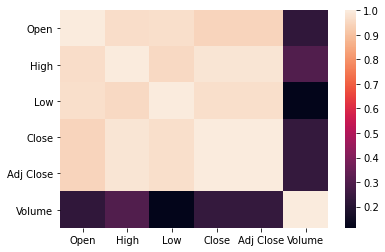

In [110]:
sns.heatmap(df.corr())

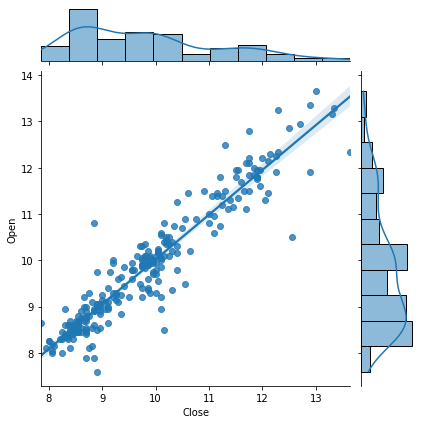

In [111]:
sns.jointplot(x='Close', y ='Open',data = df, kind ='reg')

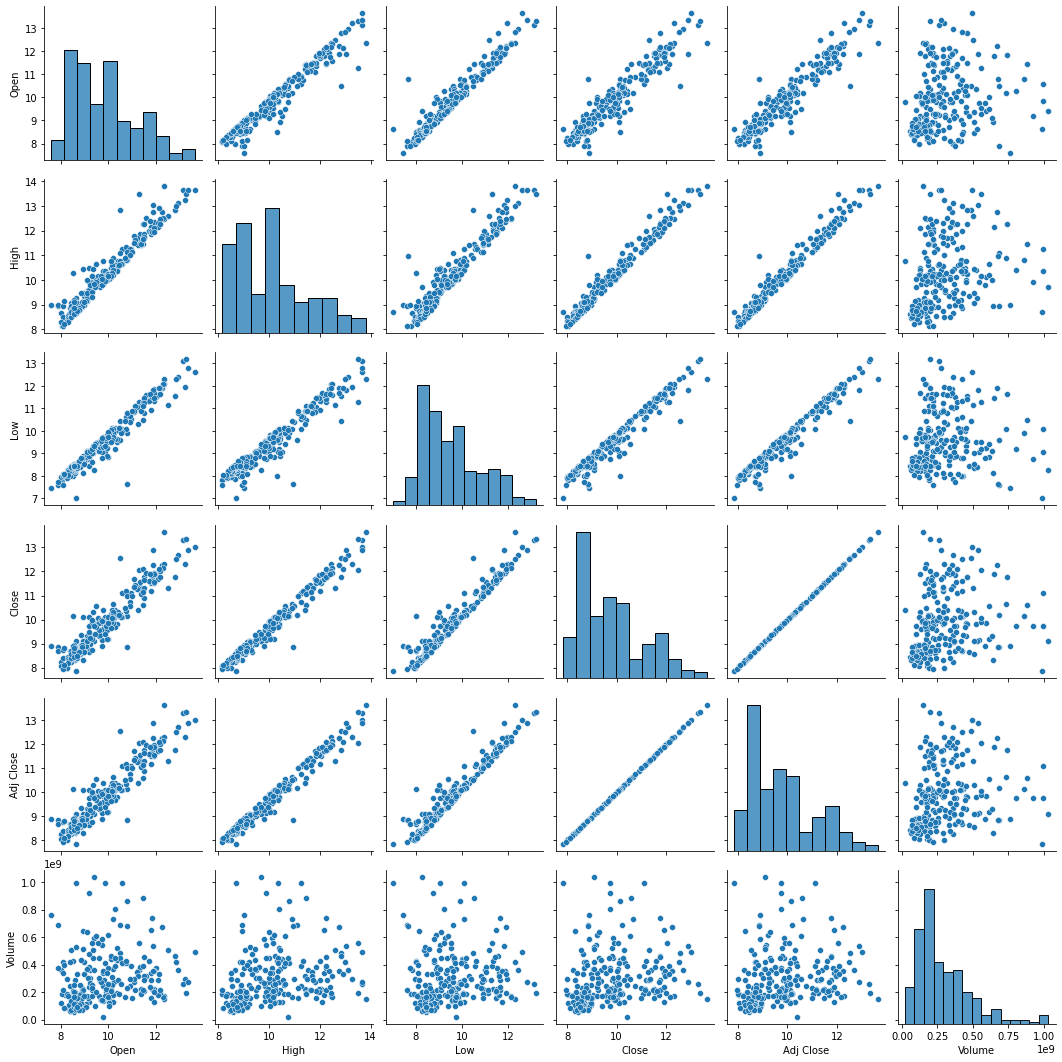

In [72]:
sns.pairplot(df)

## So lets forecaset the close column with linear Regression

In [113]:
# label the dataset 
Y = df['Close'].values
Y
Y.shape

(251,)

In [121]:
#df=df.drop('Close',axis = 1)
X = df.iloc[:,:].values
X

array([[8.50000000e+00, 1.03000000e+01, 8.00000000e+00, 1.01500000e+01,
        4.28987207e+08],
       [1.08000000e+01, 1.08000000e+01, 9.90000000e+00, 1.01500000e+01,
        8.60072479e+08],
       [1.03000000e+01, 1.04000000e+01, 9.20000000e+00, 9.75000000e+00,
        8.07989244e+08],
       ...,
       [1.01000000e+01, 1.01500000e+01, 9.50000000e+00, 9.65000000e+00,
        2.08316036e+08],
       [9.75000000e+00, 1.00500000e+01, 9.70000000e+00, 9.95000000e+00,
        1.40332528e+08],
       [1.00000000e+01, 1.01500000e+01, 9.75000000e+00, 9.85000000e+00,
        1.61600504e+08]])

### Spliting the dataset

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 0)
y_test

array([13.    ,  9.95  ,  8.6   , 11.75  , 12.1   , 11.7   , 13.65  ,
        8.95  , 11.1   , 11.9   , 13.35  ,  8.55  ,  8.5   , 10.5   ,
       10.25  ,  9.2   ,  9.55  , 10.    , 11.    ,  8.7   , 12.7   ,
        8.95  ,  8.55  ,  9.3   ,  8.9   ,  7.95  ,  9.8   , 10.1   ,
        9.75  ,  8.65  ,  9.9   , 10.35  ,  9.8076,  8.8   ,  9.4   ,
       10.1   , 12.    ,  9.15  ,  9.35  ,  9.85  ,  9.95  , 10.6   ,
        8.45  ,  8.85  ,  8.05  ,  8.7   ,  9.75  ,  9.05  , 11.4   ,
       11.65  , 10.4   ])

### Standarising the dataset

In [125]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

x_train[:,:] =SC.fit_transform(x_train[:,:])
x_test[:,:] = SC.transform(x_test[:,:])

### Modelling

In [126]:
#Applying Linear Regression for Predicting close value
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
LinReg.coef_

array([-8.50620307e-16,  1.11022302e-16,  7.77156117e-16,  1.26335229e+00,
       -4.16333634e-17])

In [127]:
y_pred = LinReg.predict(x_test)
y_pred

array([13.    ,  9.95  ,  8.6   , 11.75  , 12.1   , 11.7   , 13.65  ,
        8.95  , 11.1   , 11.9   , 13.35  ,  8.55  ,  8.5   , 10.5   ,
       10.25  ,  9.2   ,  9.55  , 10.    , 11.    ,  8.7   , 12.7   ,
        8.95  ,  8.55  ,  9.3   ,  8.9   ,  7.95  ,  9.8   , 10.1   ,
        9.75  ,  8.65  ,  9.9   , 10.35  ,  9.8076,  8.8   ,  9.4   ,
       10.1   , 12.    ,  9.15  ,  9.35  ,  9.85  ,  9.95  , 10.6   ,
        8.45  ,  8.85  ,  8.05  ,  8.7   ,  9.75  ,  9.05  , 11.4   ,
       11.65  , 10.4   ])

In [129]:
y_test

array([13.    ,  9.95  ,  8.6   , 11.75  , 12.1   , 11.7   , 13.65  ,
        8.95  , 11.1   , 11.9   , 13.35  ,  8.55  ,  8.5   , 10.5   ,
       10.25  ,  9.2   ,  9.55  , 10.    , 11.    ,  8.7   , 12.7   ,
        8.95  ,  8.55  ,  9.3   ,  8.9   ,  7.95  ,  9.8   , 10.1   ,
        9.75  ,  8.65  ,  9.9   , 10.35  ,  9.8076,  8.8   ,  9.4   ,
       10.1   , 12.    ,  9.15  ,  9.35  ,  9.85  ,  9.95  , 10.6   ,
        8.45  ,  8.85  ,  8.05  ,  8.7   ,  9.75  ,  9.05  , 11.4   ,
       11.65  , 10.4   ])

In [131]:
LinReg.score(x_test,y_test)*100

100.0

### This Model is 100% Accuracy which is excellenent. 